# El 11 ideal de la selección peruana:


Vi un articulo en [Medium]("https://www.medium.com") donde jugaban con el dataset de FIFA18 para obtener de manera muy sencilla "el 11 ideal". Es cierto que el resultado en realidad depende de muchos otros factores pero me pareció divertido aplicarlo a Perú y ver qué obteníamos. El código original también está en el artículo y decidí simplificarlo un poco más para futuros proyectos. El próximo que haga sí tendrá más sentido c:

## El Dataset:

In [158]:
import numpy as np
import emoji
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
import plotly.plotly as py

El dataset se obtuvo de Kaggle con datos del juego FIFA18. Fueron agregados Guerrero (sigo con la esperanza), Cueva y Trauco ya que no aparecen (maldito PES y liga brasileña). 

In [149]:
FIFA18 = pd.read_csv('CompleteDataset.csv', low_memory=False)
#Veamos todos los features del dataset
FIFA18.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [151]:
interesting_columns = [
    'Name',
    'Nationality', 
    'Overall', 
    'Potential', 
    'Preferred Positions',
    'Club'
]
FIFA18 = pd.DataFrame(FIFA18, columns=interesting_columns)

In [152]:
FIFA18.head()

,Name,Nationality,Overall,Potential,Preferred Positions,Club
0,Cristiano Ronaldo,Portugal,94,94,ST LW,Real Madrid CF
1,L. Messi,Argentina,93,93,RW,FC Barcelona
2,Neymar,Brazil,92,94,LW,Paris Saint-Germain
3,L. Suárez,Uruguay,92,92,ST,FC Barcelona
4,M. Neuer,Germany,92,92,GK,FC Bayern Munich


In [153]:
FIFA18['Position'] = FIFA18['Preferred Positions'].str.split().str[0]

## Gráficos relacionados jugadores peruanos:

In [111]:
def PosPlot(dataset, cad):
    plt.figure(figsize=(16,8))
    sns.set_style("whitegrid")
    plt.title('Agrupando por posiciones: '+ cad, fontsize=30, fontweight='bold', y=1.05)
    sns.countplot(x="Position", data=dataset, palette="hls")
    plt.xlabel('Posición', fontsize=20)
    plt.ylabel('Número de jugadores', fontsize=20)
    plt.show()

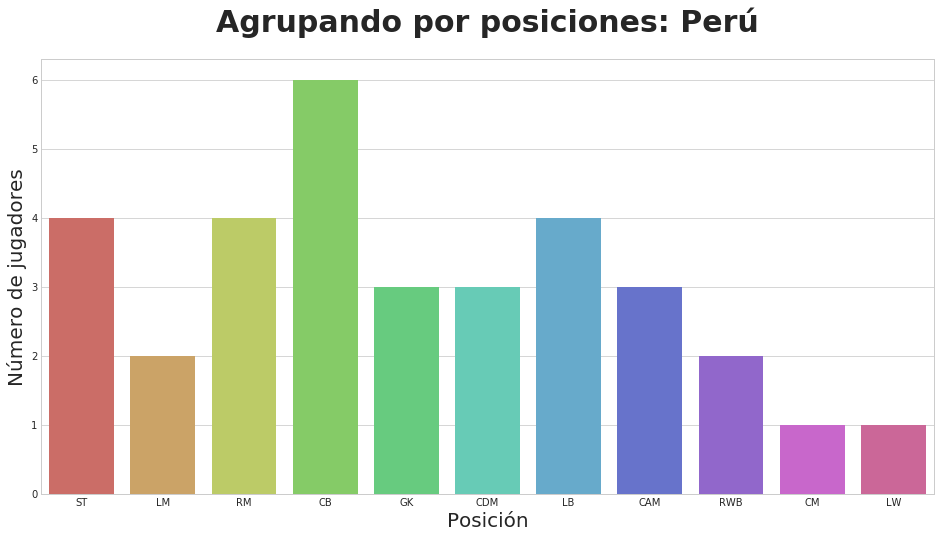

In [112]:
PosPlot(FIFA18.loc[(FIFA18['Nationality']=='Peru')],'Perú')

In [113]:
def OvPlot(dataset, cad):
    plt.figure(figsize=(16,8))
    sns.set_style("whitegrid")
    plt.title('Agrupando jugadores por Overall: '+ cad, fontsize=30, fontweight='bold', y=1.05,)
    sns.countplot(x="Overall", data=dataset, palette="hls")
    plt.xlabel('Overall', fontsize=25)
    plt.ylabel('Número de jugadores', fontsize=25)
    plt.show()

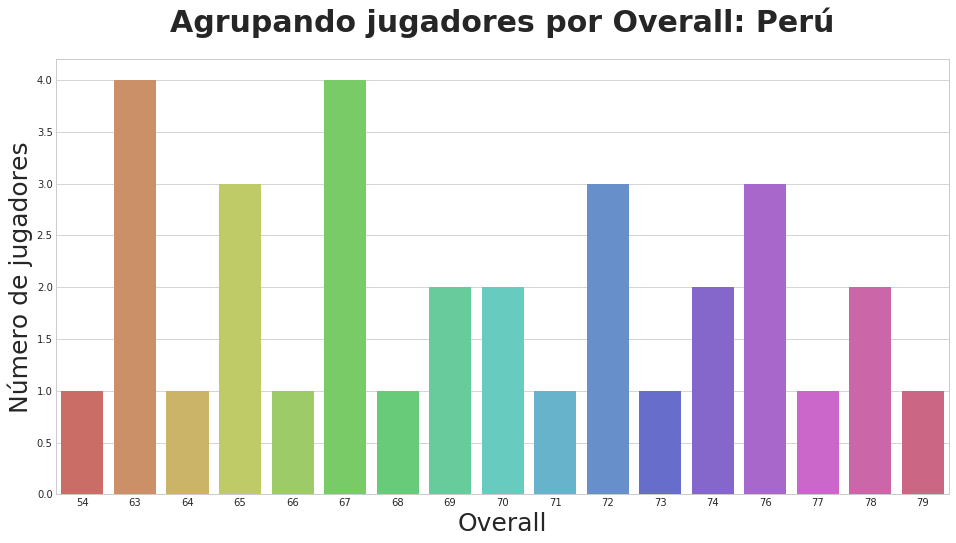

In [114]:
OvPlot(FIFA18.loc[(FIFA18['Nationality']=='Peru')],'Perú')

In [154]:
#Los jugadores de perú que aparecen en el dataset
FIFA18.loc[(FIFA18['Nationality']=='Peru' )]

,Name,Nationality,Overall,Potential,Preferred Positions,Club,Position
860,J. Farfán,Peru,78,78,ST RM,Lokomotiv Moscow,ST
962,A. Carrillo,Peru,77,78,LM RM,Watford,LM
1486,P. Hurtado,Peru,76,76,RM CAM,Vitória Guimarães,RM
1572,R. Ruidíaz,Peru,76,77,ST,Monarcas Morelia,ST
1577,C. Zambrano,Peru,76,78,CB,PAOK Thessaloniki,CB
2424,P. Gallese,Peru,74,76,GK,Tiburones Rojos de Veracruz,GK
2986,A. Rodríguez,Peru,73,73,CB,Junior de Barranquilla,CB
3297,R. Tapia,Peru,72,78,CDM CM,Feyenoord,CDM
3492,A. Callens,Peru,72,78,CB,New York City Football Club,CB
3995,L. Advíncula,Peru,72,73,RM RB,Lobos de la BUAP,RM


In [155]:
#Ahora hay que sacar a los que no fueron convocados :'
FIFA18=FIFA18.drop(FIFA18.index[[1577,3492,5705,5739,6350,6780,8494,9395,8623,12760,17106]])
len(FIFA18)

17973

In [156]:
FIFA18.index = range(len(FIFA18))
FIFA18.loc[(FIFA18['Nationality']=='Peru' )]

,Name,Nationality,Overall,Potential,Preferred Positions,Club,Position
860,J. Farfán,Peru,78,78,ST RM,Lokomotiv Moscow,ST
962,A. Carrillo,Peru,77,78,LM RM,Watford,LM
1486,P. Hurtado,Peru,76,76,RM CAM,Vitória Guimarães,RM
1572,R. Ruidíaz,Peru,76,77,ST,Monarcas Morelia,ST
2423,P. Gallese,Peru,74,76,GK,Tiburones Rojos de Veracruz,GK
2985,A. Rodríguez,Peru,73,73,CB,Junior de Barranquilla,CB
3296,R. Tapia,Peru,72,78,CDM CM,Feyenoord,CDM
3993,L. Advíncula,Peru,72,73,RM RB,Lobos de la BUAP,RM
4841,Y. Yotún,Peru,71,72,LB LM CM,Orlando City Soccer Club,LB
6286,A. Polo,Peru,69,79,RM,Monarcas Morelia,RM


## Obteniendo el mejor equipo

La función "get_best_squad_nationality" recibe una lista de alineaciones, el nombre de un país; y devuelve el promedio de los overalls de los jugadores elegidos y una tabla con los jugadores.

In [143]:
def get_best_squad_nationality(positions, nationality):
    FIFA18_copy = FIFA18.copy().loc[(FIFA18.copy()['Nationality']==nationality)]
    jugadores = []
    #Para cada posición, por ejemplo, arquero, delantero, volante derecho,
    #obtiene el jugador con el mejor overall de ese país
    for pos in positions:
        #Agregamos a nuestra lista de jugadores
        jugadores.append([
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(pos)]['Overall'].idxmax()]]['Position'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(pos)]['Overall'].idxmax()]]['Name'].to_string(index = False), 
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(pos)]['Overall'].idxmax()]]['Club'].to_string(index = False), 
            FIFA18_copy[FIFA18_copy['Position'].str.contains(pos)]['Overall'].max()  ])
        #para que no haya repetidos
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'].str.contains(pos)]['Overall'].idxmax(), 
                         inplace = True)
    return np.mean([x[3] for x in jugadores]).round(2), pd.DataFrame(np.array(jugadores).reshape(11,4), 
                                                                 columns = ['Position', 'Player','Club','Overall']).to_string(index = False)

"get_summary_n" recibe la lista de alineaciones, sus nombres respectivos y el país. Imprime los overalls promedio de cada alineación y la Alineación con el mejor Overall.

In [144]:
def get_summary_n(squad_list, squad_name, country):
    results = []
    sq_best_rating = 0
    #Para cada alineación
    for j, k  in zip(squad_list, squad_name):
        #Obtenemos el puntaje y la lista de jugadores
        O_temp_rating, O_team  = get_best_squad_nationality(positions = j, nationality = country)
        #Lo agregamos a resultados para imprimirlos en nuestra tabla luego
        results.append([country, k, O_temp_rating.round(2)])    
        #Actualizamos la lista de jugadores con el mejor puntaje
        if (O_temp_rating > sq_best_rating):
            sq_best_name = k
            sq_best_team = O_team
            sq_best_rating = O_temp_rating
            
    #Imprimimos nuestra tabla de puntajes    
    summary = pd.DataFrame(np.array(results).reshape(-1,3), columns = ['Nationality', 'Squad', 'Overall'])
    summary.set_index('Nationality', inplace = True)
    summary[['Overall']] = summary[['Overall']].astype(float)
    print(summary,'\n')
    
    #Imprimimos l mejor team
    print(sq_best_name)
    print('Average rating: {:.1f}'.format(sq_best_rating)+'\n')
    print(sq_best_team)

In [145]:
#Listas de alineaciones
#GF: Goalkeeper
#CB: Center Back
#RB: Right Back
#LB: Left Back
#RWB:Right Wing Back
#LWB: Left Wing Back
#CF: Center Forward
#CM: Center midfield
#CAM: Center attack midlield
#CDM: Center defense midlield
#LM: Left midfield
#RM:Right midfield
#RW: Right Winger
#LW: Left winger
#ST: Striker

squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM|CDM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB','RM|CAM|CM|CF','CM|CAM|CDM|RM', 'CM|CAM|CDM', 'CM|CAM|CDM|LM', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CM|CAM|CDM', 'LM|LW', 'ST|CF']

In [146]:
#Lista de listas con alineaciones y sus nombres
squad_list = [squad_442_strict, squad_343_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['4-4-2', '3-4-3', '4-3-1-2', '4-3-3', '4-2-3-1']

In [157]:
get_summary_n(squad_list, squad_name, 'Peru')

               Squad  Overall
Nationality                  
Peru           4-4-2    72.73
Peru           3-4-3    71.82
Peru         4-3-1-2    72.73
Peru           4-3-3    71.55
Peru         4-2-3-1    71.55 

4-4-2
Average rating: 72.7

Position        Player                         Club Overall
     GK    P. Gallese  Tiburones Rojos de Veracruz      74
    RWB      A. Corzo    Universitario de Deportes      65
     CB  A. Rodríguez       Junior de Barranquilla      73
     CB      C. Ramos  Tiburones Rojos de Veracruz      67
     LB     M. Trauco                C.R. Flamengo      74
     RM    P. Hurtado            Vitória Guimarães      76
    CDM      R. Tapia                    Feyenoord      72
    CDM     P. Aquino             Lobos de la BUAP      65
     LM   A. Carrillo                      Watford      77
     ST   P. Guerrero                C.R. Flamengo      79
     ST     J. Farfán             Lokomotiv Moscow      78


## Volveremos al mundial...

![Volveremos al mundiaaaaal...](team.png)